In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.util import random_noise
import numpy as np

In [2]:
p_srcs = [cv.imread(f'P{i}.png',cv.IMREAD_GRAYSCALE) for i in range(1,5)]
p_srcs_t = [cv.threshold(src, 128, 255, cv.THRESH_BINARY)[1] for src in p_srcs]
p_srcs_t += [np.uint8(random_noise(p_srcs_t[0]), mode='s&p')]

r_srcs = [cv.imread(f'R{i}.png',cv.IMREAD_GRAYSCALE) for i in range(1,5)]
r_srcs_t = [cv.threshold(src, 128, 255, cv.THRESH_BINARY)[1] for src in r_srcs]
r_srcs_t += [np.uint8(random_noise(r_srcs_t[0]), mode='s&p')]

w_srcs = [cv.imread(f'W{i}.png',cv.IMREAD_GRAYSCALE) for i in range(1,5)]
w_srcs_t = [cv.threshold(src, 128, 255, cv.THRESH_BINARY)[1] for src in w_srcs]
w_srcs_t += [np.uint8(random_noise(w_srcs_t[0]), mode='s&p')]

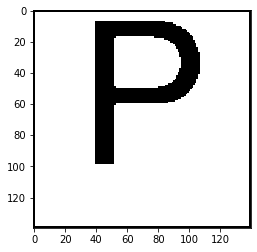

In [3]:
plt.imshow(p_srcs_t[0],cmap='gray')

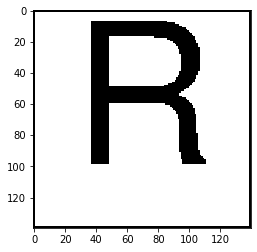

In [4]:
plt.imshow(r_srcs_t[0],cmap='gray')

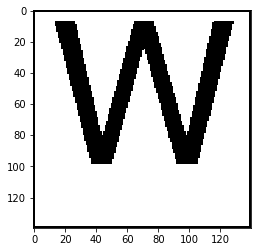

In [5]:
plt.imshow(w_srcs_t[0],cmap='gray')

In [6]:
p_hu_moments = np.array([cv.HuMoments(cv.moments(img)) for img in p_srcs_t])
p_hu_moments = -1* np.copysign(1.0, p_hu_moments) * np.log10(abs(p_hu_moments))
r_hu_moments = np.array([cv.HuMoments(cv.moments(img)) for img in r_srcs_t])
r_hu_moments = -1* np.copysign(1.0, r_hu_moments) * np.log10(abs(r_hu_moments))
w_hu_moments = np.array([cv.HuMoments(cv.moments(img)) for img in w_srcs_t])
w_hu_moments = -1* np.copysign(1.0, w_hu_moments) * np.log10(abs(w_hu_moments))

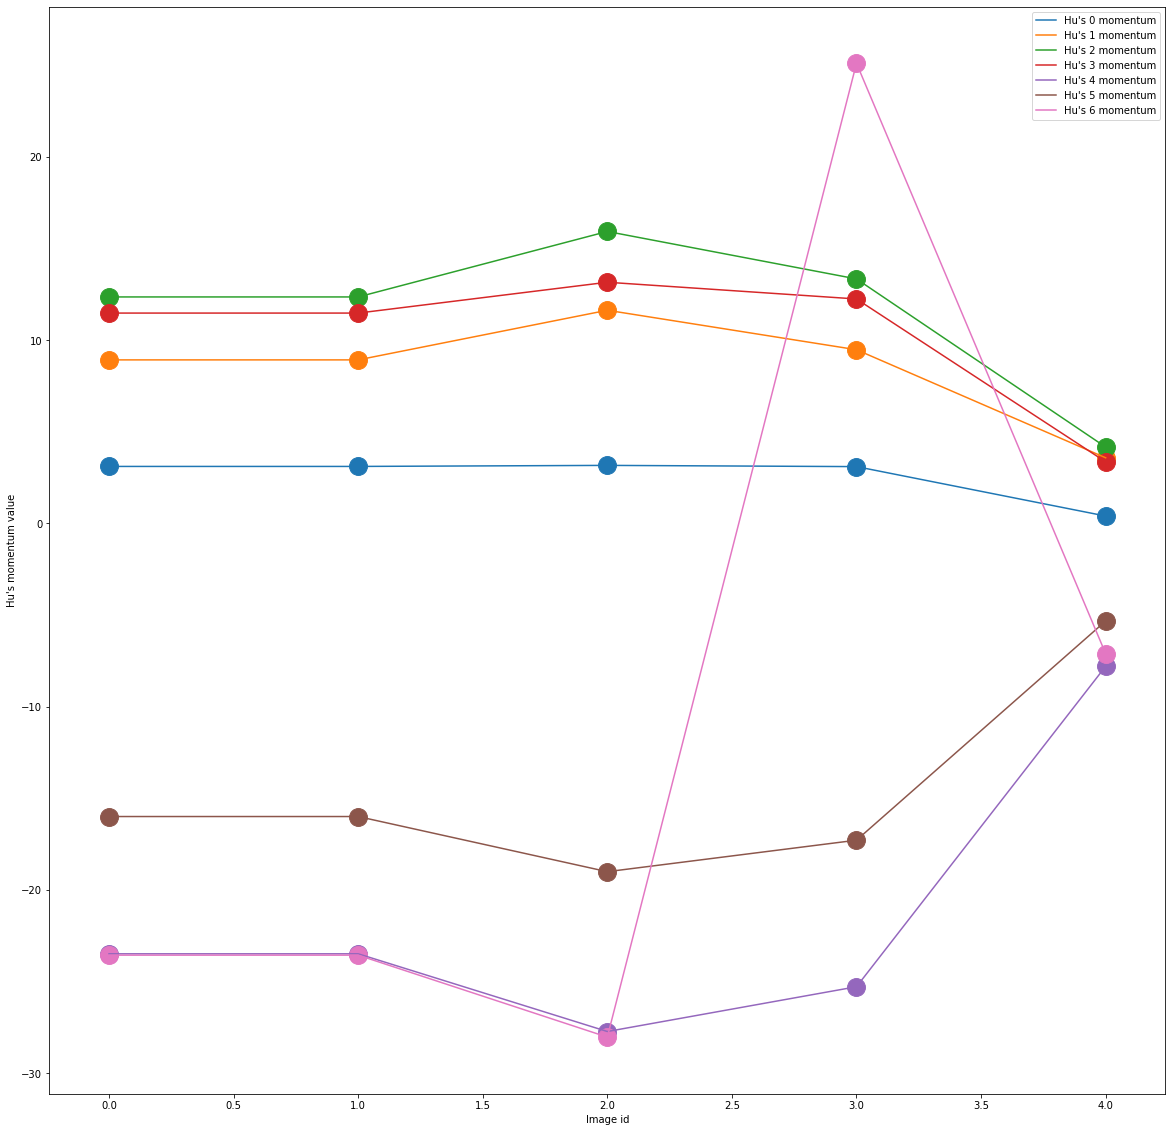

In [7]:
fig,ax = plt.subplots(figsize=(20,20))
for i  in range(7):
    ax.scatter(np.array(range(0,5)),p_hu_moments[:,i],marker='o',s=320)
    ax.plot(p_hu_moments[:,i])
ax.legend([f'Hu\'s {i} momentum'for i in range(7)])
plt.ylabel('Hu\'s momentum value')
plt.xlabel('Image id')
plt.show()

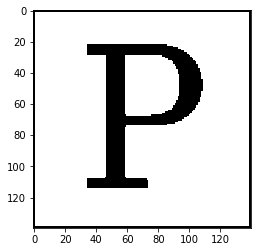

In [8]:
plt.imshow(p_srcs_t[3],cmap='gray')

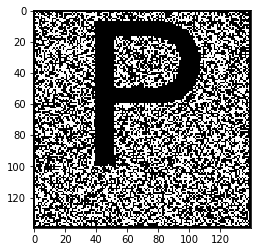

In [9]:
plt.imshow(p_srcs_t[4],cmap='gray')

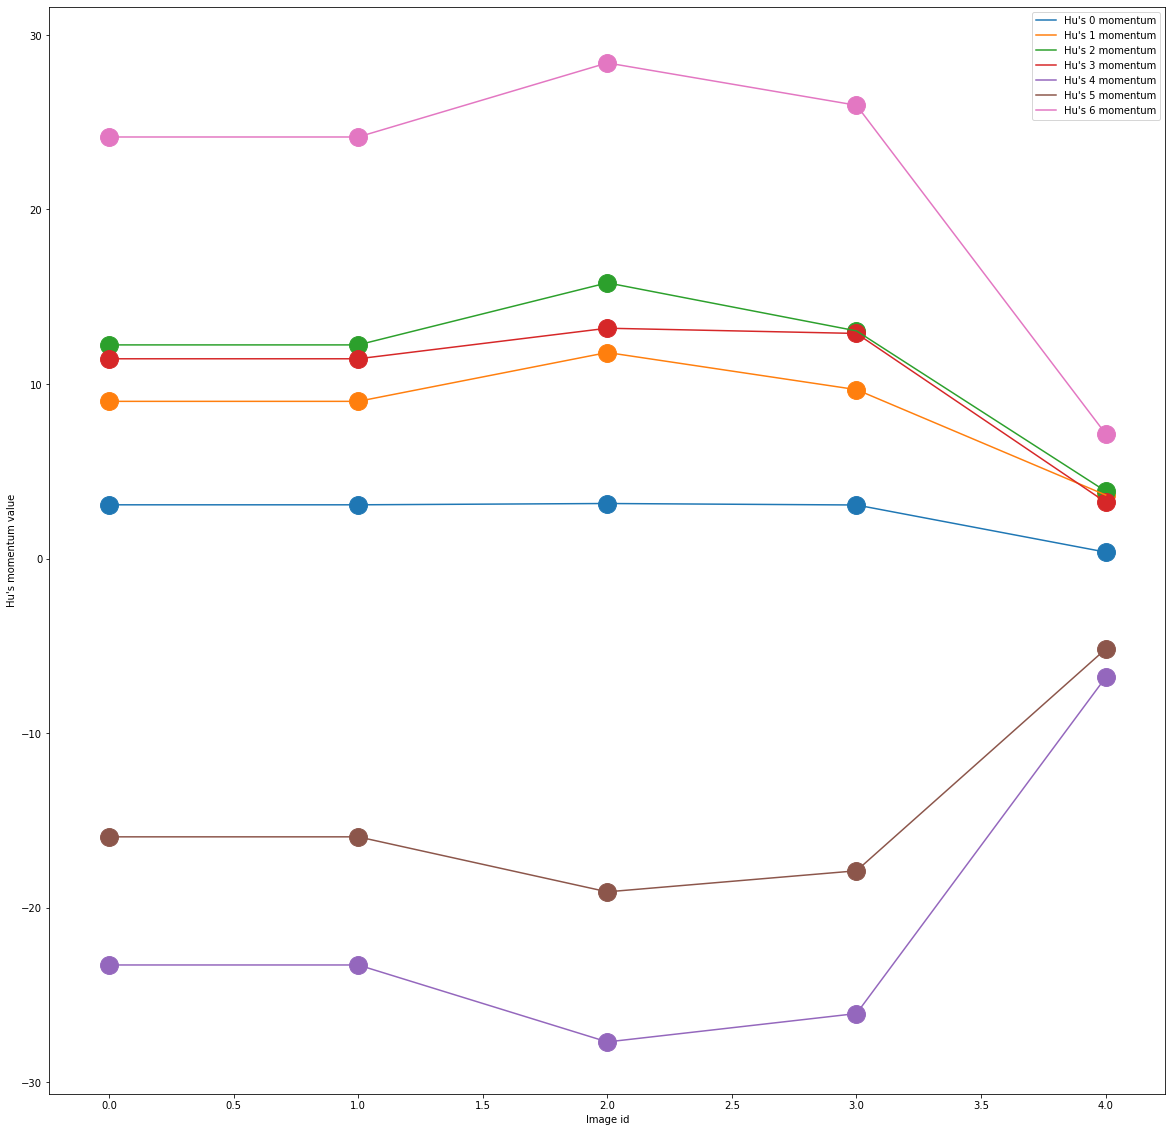

In [10]:
fig,ax = plt.subplots(figsize=(20,20))
for i  in range(7):
    ax.scatter(np.array(range(0,5)),r_hu_moments[:,i],marker='o',s=320)
    ax.plot(r_hu_moments[:,i])
ax.legend([f'Hu\'s {i} momentum'for i in range(7)])
plt.ylabel('Hu\'s momentum value')
plt.xlabel('Image id')
plt.show()

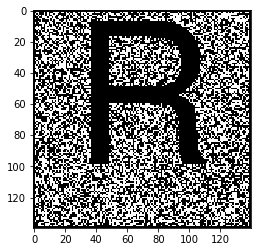

In [11]:
plt.imshow(r_srcs_t[4],cmap='gray')

# P with R plot

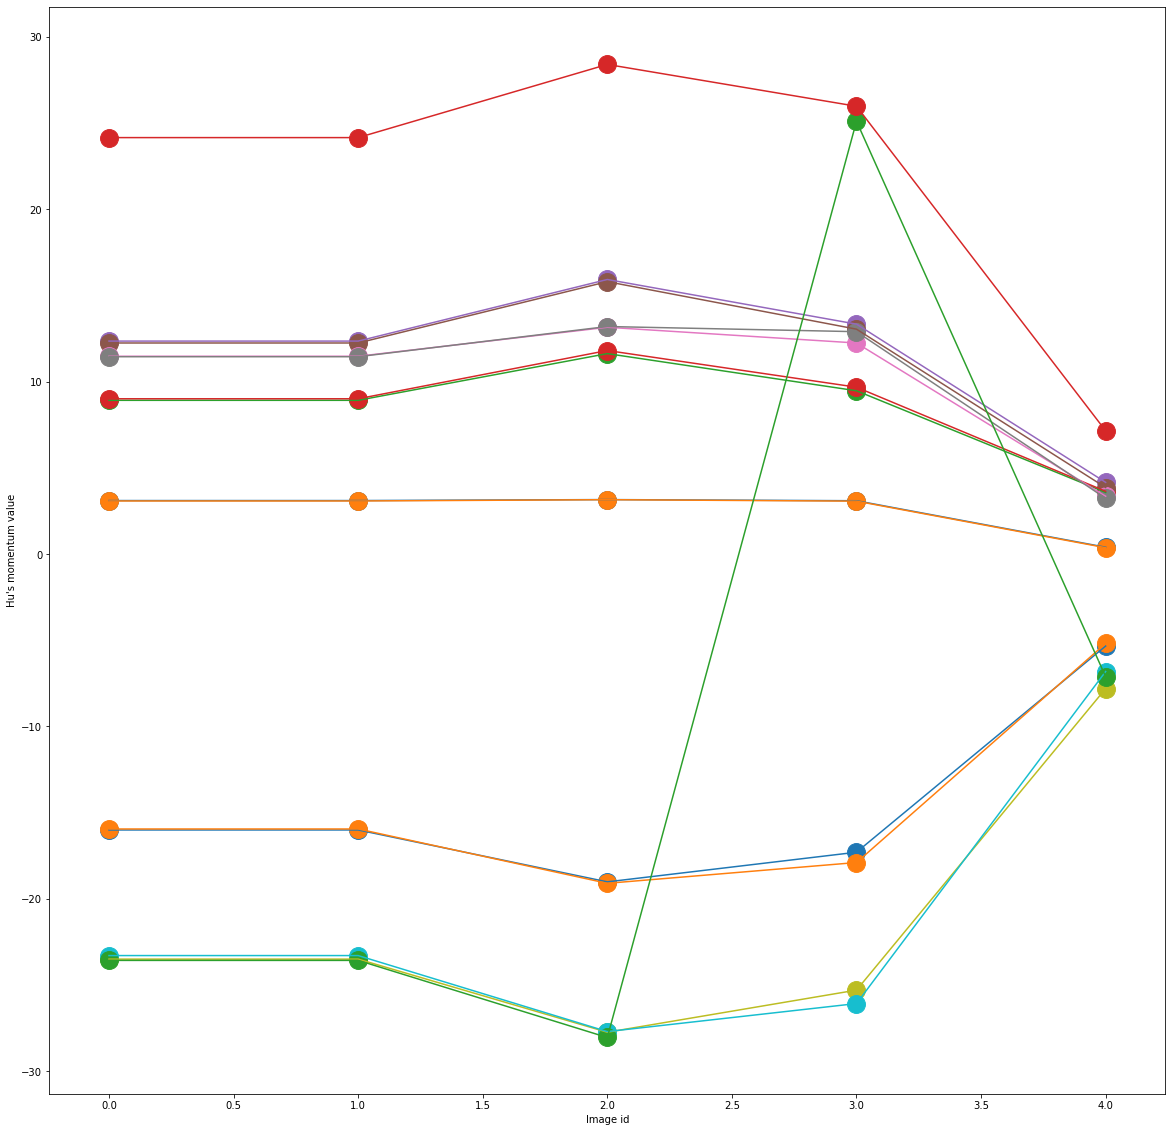

In [12]:
fig,ax = plt.subplots(figsize=(20,20))
for i  in range(7):
    ax.scatter(np.array(range(0,5)),p_hu_moments[:,i],marker='o',s=320)
    ax.plot(p_hu_moments[:,i])
    ax.scatter(np.array(range(0,5)),r_hu_moments[:,i],marker='o',s=320)
    ax.plot(r_hu_moments[:,i])
# ax.legend([f'Hu\'s {i} momentum'for i in range(7)])
plt.ylabel('Hu\'s momentum value')
plt.xlabel('Image id')
plt.show()

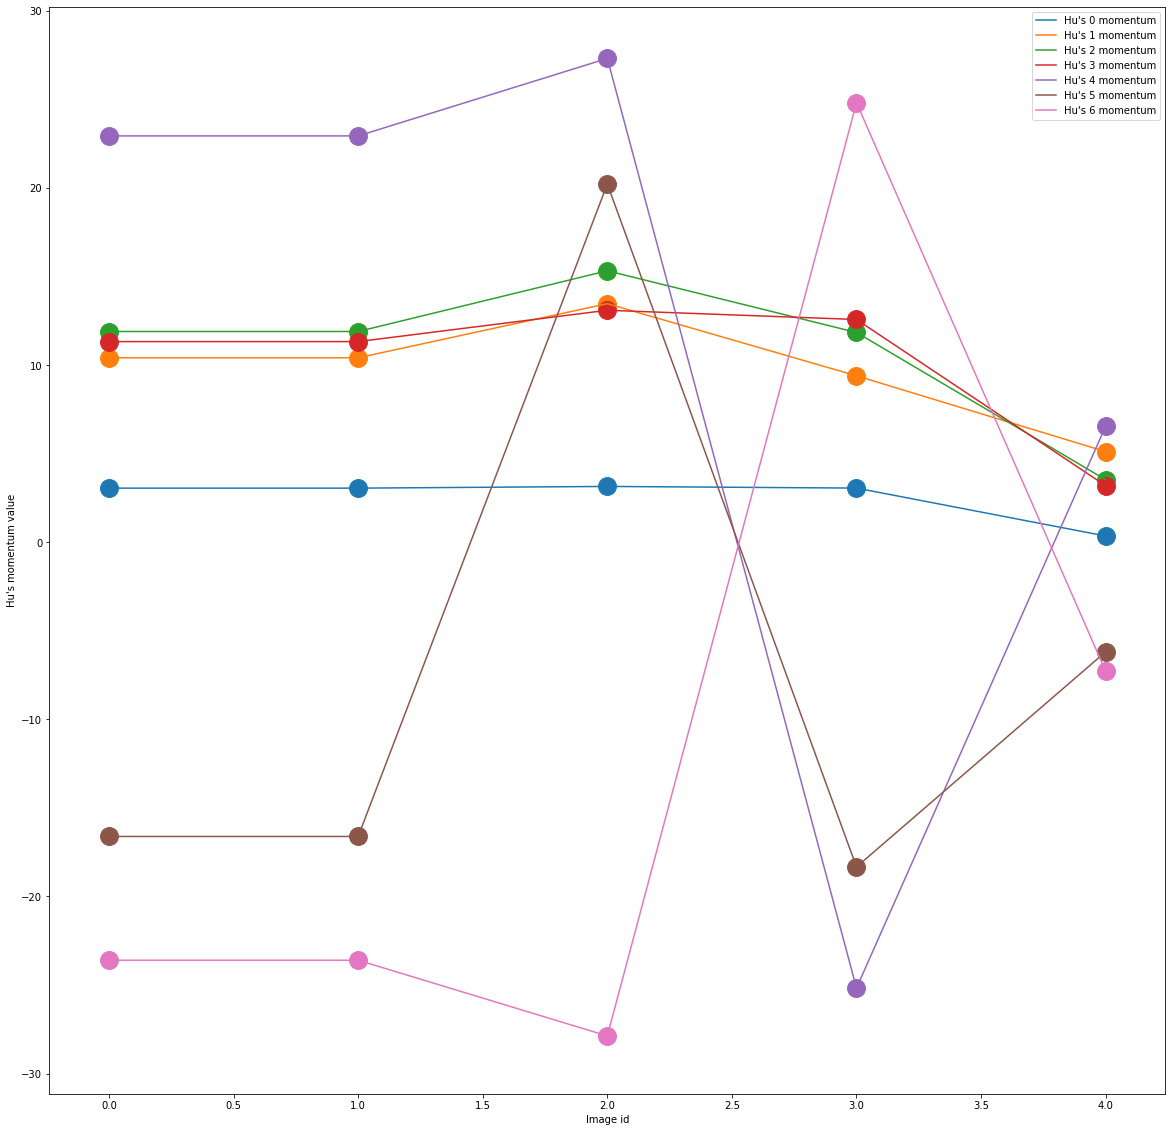

In [13]:
fig,ax = plt.subplots(figsize=(20,20))
for i  in range(7):
    ax.scatter(np.array(range(0,5)),w_hu_moments[:,i],marker='o',s=320)
    ax.plot(w_hu_moments[:,i])
ax.legend([f'Hu\'s {i} momentum'for i in range(7)])
plt.ylabel('Hu\'s momentum value')
plt.xlabel('Image id')
plt.show()

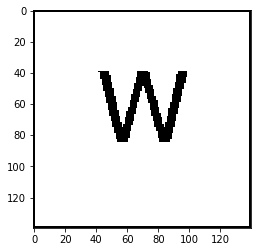

In [14]:
plt.imshow(w_srcs_t[2],cmap='gray')

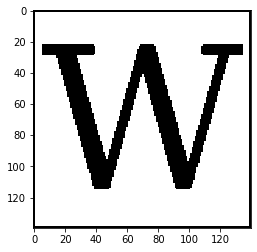

In [15]:
plt.imshow(w_srcs_t[3],cmap='gray')

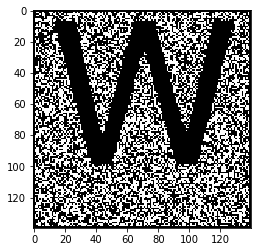

In [16]:
plt.imshow(w_srcs_t[4],cmap='gray')

# P with W plot

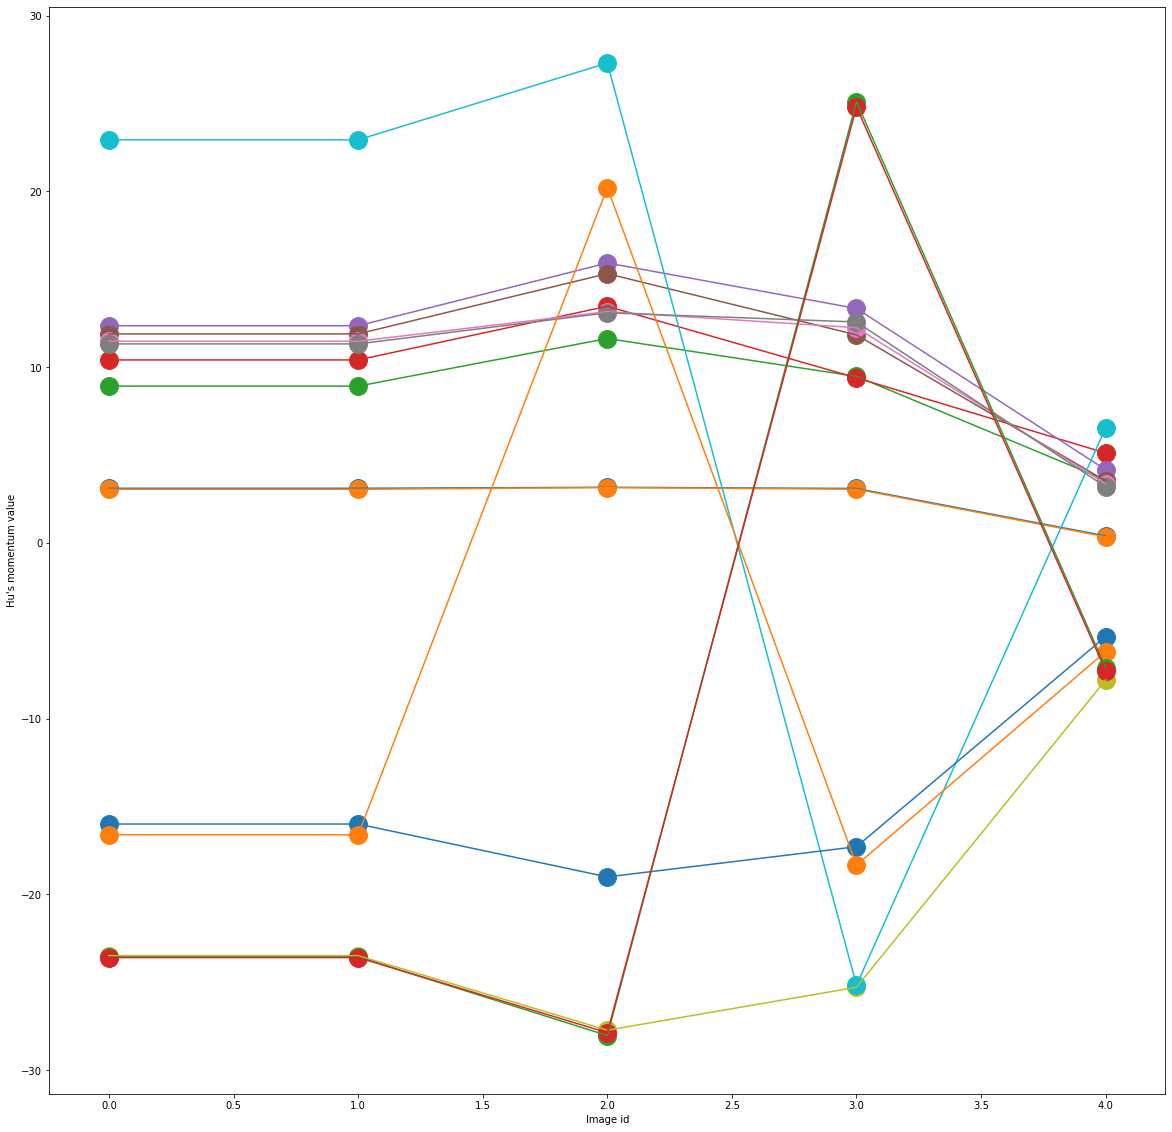

In [17]:
fig,ax = plt.subplots(figsize=(20,20))
for i  in range(7):
    ax.scatter(np.array(range(0,5)),p_hu_moments[:,i],marker='o',s=320)
    ax.plot(p_hu_moments[:,i])
    ax.scatter(np.array(range(0,5)),w_hu_moments[:,i],marker='o',s=320)
    ax.plot(w_hu_moments[:,i])
# ax.legend([f'Hu\'s {i} momentum'for i in range(7)])
plt.ylabel('Hu\'s momentum value')
plt.xlabel('Image id')
plt.show()

Jak widać na załączonych wykresach wielomiany Hu nie dają zbyt dobrych wyników nawet dla podobnych danych, Wartości momentów są zbliżone do siebie nawet dla różnych liter. Jeden z momentów bardzo mocno reguje na zmianę czcionki, gdzie pozostałe momenty nie pokazują jakiejś wyraźniej zmiany. Wszystkie momenty istotnie zareagowały na szum na obrazku